<a href="https://colab.research.google.com/github/chacha86/pythonai/blob/main/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC_%ED%9A%8C%EA%B7%80_%EB%B0%8F_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fish = pd.read_csv('/content/Fish.csv')

In [19]:
# 분류
## 이진분류
## 특성 -> 2개만(Length1, Weight)

bream_perch = fish[(fish['Species'] == 'Bream') | (fish['Species'] == 'Perch')]

bream_perch_data = bream_perch[['Length1', 'Weight']]
bream_perch_target = bream_perch['Species']
bream_perch_data
bream_perch_target

from sklearn.model_selection import train_test_split

trd, tsd, trt, tst = train_test_split(bream_perch_data, bream_perch_target, train_size=0.8, stratify = bream_perch_target, random_state=42)

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(trd, trt)


DecisionTreeClassifier()

In [33]:
dtc.score(trd, trt), dtc.score(tsd, tst)

(1.0, 0.8947368421052632)

In [21]:
trd

,Length1,Weight
125,40.1,1100.0
119,36.9,850.0
94,21.0,150.0
72,7.5,5.9
32,36.2,925.0
...,...,...
105,25.4,250.0
17,30.4,700.0
124,39.8,1000.0
126,40.2,1000.0


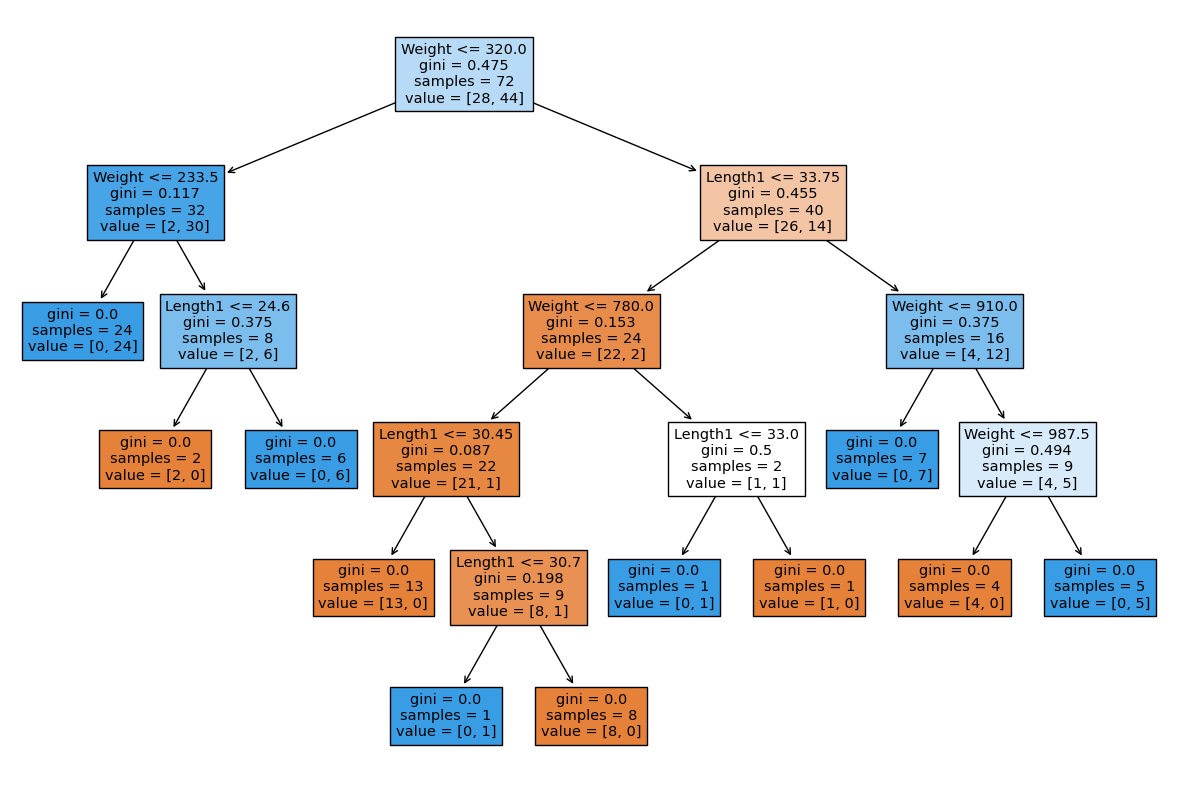

In [24]:
## 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dtc, filled=True, feature_names=trd.columns)
plt.show()


In [ ]:
## root 노드
## Weight <= 320
## Weight -> 결정 변수,  320 -> 결정값(threshold)
## gini -> 불순도(0에 가까울 수록 좋음)
## sample -> 해당 노드에 포함되는 샘플(데이터) 개수
## value -> 클래스별 개수
## Weight가 320이 나온 이유 -> 모델 따져봤을 때 가장 좋은 분할 값이더라.




In [ ]:
## 산점도 물고기 분포 시각화
sns.scatterplot(data=bream_perch, x='Length1', y='Weight', hue='Species')
plt.axhline(y=320, color='r')


In [ ]:
sns.scatterplot(data=bream_perch, x='Length1', y='Weight', hue='Species')
plt.axvline(x=33.75, color='g')
plt.axhline(y=320, color='r')
